In [1]:
import nltk
import multiprocessing as mp
import time
import itertools
from utils.k_success import top_k_words, success_at_k, average_k
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/_sudharshan14/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/_sudharshan14/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
from nltk.corpus import wordnet as wn
print("Total number of words in Wordnet = ", len(list(wn.words())))

Total number of words in Wordnet =  147306


In [4]:
birkbeck_corpus_data = []
with open('Data/FAWTHROP1DAT.643', 'r') as corpus_data1:
    for line in corpus_data1:
        data = line.split()
        birkbeck_corpus_data.append(data)
    
with open('Data/SHEFFIELDDAT.643', 'r') as corpus_data2:
    for line in corpus_data2:
        data = line.split()
        birkbeck_corpus_data.append(data)

birkbeck_corpus_data = sorted(birkbeck_corpus_data)
print("Total number of words in Birbeck corpus = ", len(birkbeck_corpus_data))

Total number of words in Birbeck corpus =  1193


In [5]:
print(birkbeck_corpus_data[:10])

[['ABATTOIR', 'ABBATOIR'], ['ABHORRENCE', 'ABHORENCE'], ['ABILITY', 'ABILTY'], ['ABROAD', 'ABRAOD'], ['ABSENCE', 'ABSENSE'], ['ABSORBENT', 'ABSORBANT'], ['ABSORPTION', 'ABSORBTION'], ['ACADEMIC', 'ACEDEMIC'], ['ACCEDE', 'ACCEED'], ['ACCELERATE', 'ACELLERATE']]


In [6]:

pool = mp.Pool()
start_time = time.time()
top_k = []
top_k.append(pool.map(top_k_words, birkbeck_corpus_data[:10]))
    
print("Parallelization Runtime: %s" % (time.time() - start_time))

Parallelization Runtime: 6.178015947341919


In [7]:
print(top_k)

[[{'correct_word': 'abattoir', 'incorrect_word': 'abbatoir', 'top_1': ['abator'], 'top_5': ['abator', 'abattoir', 'abatic', 'abbatial', 'sabbatic'], 'top_10': ['abator', 'abattoir', 'abatic', 'abbatial', 'sabbatic', 'abatis', 'abattis', 'abettor', 'aerator', 'aviator']}, {'correct_word': 'abhorrence', 'incorrect_word': 'abhorence', 'top_1': ['abhorrence'], 'top_5': ['abhorrence', 'adherence', 'abhorrent', 'aberrance', 'abience'], 'top_10': ['abhorrence', 'adherence', 'abhorrent', 'aberrance', 'abience', 'absence', 'absorbance', 'absorbency', 'coherence', 'florence']}, {'correct_word': 'ability', 'incorrect_word': 'abilty', 'top_1': ['ability'], 'top_5': ['ability', 'atilt', 'bilgy', 'bitty', 'guilty'], 'top_10': ['ability', 'atilt', 'bilgy', 'bitty', 'guilty', 'silty', 'ably', 'abila', 'agility', 'ailey']}, {'correct_word': 'abroad', 'incorrect_word': 'abraod', 'top_1': ['abroad'], 'top_5': ['abroad', 'afraid', 'aboard', 'aborad', 'brad'], 'top_10': ['abroad', 'afraid', 'aboard', 'abor

In [8]:
top_k_result = []
start_time = time.time()
top_k_result.append(pool.map(top_k_words, birkbeck_corpus_data))
print(top_k_result[0][-10:])

[{'correct_word': 'worshiping', 'incorrect_word': 'worshipping', 'top_1': ['whipping'], 'top_5': ['whipping', 'worshipped', 'horsewhipping', 'shipping', 'worshipper'], 'top_10': ['whipping', 'worshipped', 'horsewhipping', 'shipping', 'worshipper', 'gripping', 'ripping', 'slipping', 'tripping', 'whopping']}, {'correct_word': 'worth', 'incorrect_word': 'worht', 'top_1': ['worst'], 'top_5': ['worst', 'wort', 'port', 'wordy', 'world'], 'top_10': ['worst', 'wort', 'port', 'wordy', 'world', 'wormy', 'worn', 'worse', 'worth', 'worthy']}, {'correct_word': 'would', 'incorrect_word': 'wouls', 'top_1': ['foul'], 'top_5': ['foul', 'wooly', 'world', 'wound', 'boule'], 'top_10': ['foul', 'wooly', 'world', 'wound', 'boule', 'bowls', 'doula', 'gould', 'hours', 'joule']}, {'correct_word': 'yacht', 'incorrect_word': 'yahct', 'top_1': ['act'], 'top_5': ['act', 'baht', 'fact', 'pact', 'tact'], 'top_10': ['act', 'baht', 'fact', 'pact', 'tact', 'yacca', 'yacht', 'yack', 'yahi', 'yahoo']}, {'correct_word': '

In [9]:
# Getting the success at k
success = success_at_k(top_k_result[0])
print(dict(itertools.islice(reversed(success.items()), 5)))

{'zeenith': {'success_at_1': 1, 'success_at_5': 1, 'success_at_10': 1}, 'zelous': {'success_at_1': 1, 'success_at_5': 1, 'success_at_10': 1}, 'yeild': {'success_at_1': 0, 'success_at_5': 0, 'success_at_10': 0}, 'yoman': {'success_at_1': 0, 'success_at_5': 0, 'success_at_10': 1}, 'yerned': {'success_at_1': 0, 'success_at_5': 0, 'success_at_10': 0}}


In [10]:
# Getting the average success at k
avg_success = average_k(success)
print(avg_success)

{'success_at_1': 0.611864406779661, 'success_at_5': 0.7974576271186441, 'success_at_10': 0.8169491525423729}


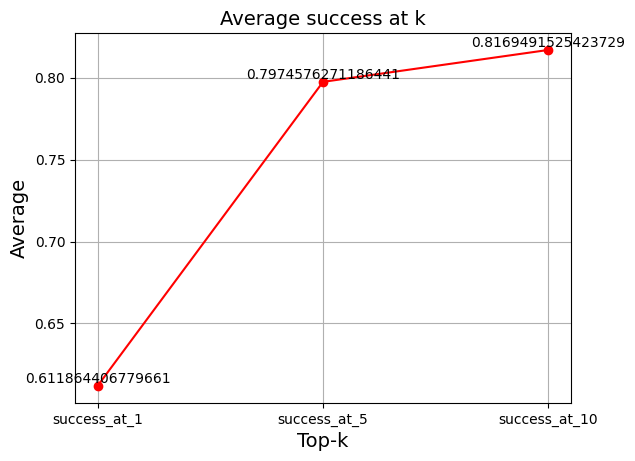

In [11]:
x = list(avg_success.keys())
y = list(avg_success.values())

# Plotting the line graph
plt.plot(x, y, marker='o', color='red', linestyle='-')

# Adding labels and title
plt.title('Average success at k', fontsize=14)
plt.xlabel('Top-k', fontsize=14)
plt.ylabel('Average', fontsize=14)
plt.grid(True)

# Adding data labels
for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='center', va='bottom')

# Saving the graph
plt.savefig('average_success_line.png', dpi=400)

# Displaying the graph
plt.show()